This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [2]:
# Relative Risk with PTS
lead = 3
obs = 3

data = pd.read_csv("../csv/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs_dataset_no_pts.csv".format(lead, obs, lead, obs), low_memory=False)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    646.0  69.0           78.0            78.0   
1             151708      1   1827.0  79.0           38.0            38.0   
2             152171      1   2200.0  84.0           38.0            38.0   
3             155126      1   3341.0  71.0           65.0            65.0   
4             156970      1  17819.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
21630        3352487      0    780.0  60.0           45.0            45.0   
21631        3352563      0    743.0  34.0           54.0            54.0   
21632        3352747      0    826.0  30.0           31.0            31.0   
21633        3353044      0   3218.0  52.0           41.0            41.0   
21634        3353077      0   1113.0  60.0           36.0            36.0   

       UrgentAdmission  AdmissionCategory  NumBeds  TeachingStatus  ...  \
0                  1.0                4.0      2.0               0  ...   
1                  1.0                4.0      4.0               1  ...   
2                  0.0                4.0      2.0               0  ...   
3                  0.0                4.0      4.0               1  ...   
4                  1.0                4.0      4.0               1  ...   
...                ...                ...      ...             ...  ...   
21630              0.0                4.0      4.0               0  ...   
21631              1.0                4.0      2.0               0  ...   
21632              1.0                4.0      4.0               0  ...   
21633              1.0                4.0      2.0               0  ...   
21634              1.0                4.0      4.0               0  ...   

      comorbidity_alcohol comorbidity_drug comorbidity_depre last_24hr_urine  \
0                     0.0              0.0               0.0             NaN   
1                     0.0              0.0               0.0           300.0   
2                     0.0              0.0               0.0             NaN   
3                     0.0              0.0               0.0             NaN   
4                     1.0              0.0               0.0          1945.0   
...                   ...              ...               ...             ...   
21630                 NaN              NaN               NaN          2470.0   
21631                 0.0              0.0               0.0          1555.0   
21632                 0.0              0.0               0.0          1800.0   
21633                 0.0              0.0               0.0          2210.0   
21634                 0.0              0.0               0.0          1775.0   

      tranfuse_rbc tranfuse_plasma tranfuse_platelet dialysis  surgical  \
0                0               0                 0        1         0   
1                0               0                 0        0         0   
2                0               0                 0        0         1   
3                1               0                 0        0         1   
4                0               0                 0        0         0   
...            ...             ...               ...      ...       ...   
21630            0               0                 0        0         1   
21631            0               0                 0        0         0   
21632            0               0                 0        0         0   
21633            0               0                 0        0         0   
21634            0               0                 0        0         0   

       mv_duration  
0              0.0  
1              0.0  
2              0.0  
3            297.0  
4              0.0  
...            ...  
21630          0.0  
21631          0.0  
21632          0.0  
21633          0.0  
21634          0.0  

[21635 rows x 267 columns]

In [3]:
for col in data.columns:
    print(col)
    print(missing_data(data, col))

PatientStayID
(0, 21635)
Class
(0, 21635)
LOS
(0, 21635)
Age
(0, 21635)
APACHEIVscore
(2537, 21635)
APACHEIVaScore
(2537, 21635)
UrgentAdmission
(592, 21635)
AdmissionCategory
(592, 21635)
NumBeds
(2225, 21635)
TeachingStatus
(0, 21635)
Gender
(0, 21635)
AdmitHeight
(0, 21635)
AdmitTime24
(0, 21635)
AdmitSource
(3720, 21635)
UnitType
(0, 21635)
UnitAdmitTime
(0, 21635)
UnitAdmitSource
(56, 21635)
AdmitWeight
(0, 21635)
HistAICD
(0, 21635)
HistAngina
(0, 21635)
HistArrythmia
(0, 21635)
HistCHF
(0, 21635)
HistCABG
(0, 21635)
HistHypertension
(0, 21635)
HistMI
(0, 21635)
HistPacemaker
(0, 21635)
HistPVD
(0, 21635)
HistPCI
(0, 21635)
HistPulmEmb
(0, 21635)
HistHeartTransp
(0, 21635)
HistValveDis
(0, 21635)
HistVenThromb
(0, 21635)
HistCushing
(0, 21635)
HistHypercalcemia
(0, 21635)
Histhyperthyroid
(0, 21635)
Histhypothyroid
(0, 21635)
Histdiabetes
(0, 21635)
HistSteroid Use
(0, 21635)
HistCirrhosis
(0, 21635)
HistHypersplenism
(0, 21635)
HistPUD
(0, 21635)
HistLiverTransp
(0, 21635)
HistA

In [4]:
data = process_all(data)
data["mv_duration_ratio"] = data["mv_duration"]/data["LOS"]
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    646.0  69.0           78.0            78.0   
1             151708      1   1827.0  79.0           38.0            38.0   
2             152171      1   2200.0  84.0           38.0            38.0   
3             155126      1   3341.0  71.0           65.0            65.0   
4             156970      1  17819.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
21630        3352487      0    780.0  60.0           45.0            45.0   
21631        3352563      0    743.0  34.0           54.0            54.0   
21632        3352747      0    826.0  30.0           31.0            31.0   
21633        3353044      0   3218.0  52.0           41.0            41.0   
21634        3353077      0   1113.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  1.0      2.0               0     1.0  ...   
1                  1.0      4.0               1     0.0  ...   
2                  0.0      2.0               0     1.0  ...   
3                  0.0      4.0               1     0.0  ...   
4                  1.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
21630              0.0      4.0               0     1.0  ...   
21631              1.0      2.0               0     1.0  ...   
21632              1.0      4.0               0     0.0  ...   
21633              1.0      2.0               0     0.0  ...   
21634              1.0      4.0               0     1.0  ...   

      UnitAdmitSource_Floor UnitAdmitSource_ICU  UnitAdmitSource_Missing  \
0                         0                   0                        0   
1                         0                   0                        0   
2                         0                   0                        0   
3                         0                   0                        0   
4                         0                   0                        0   
...                     ...                 ...                      ...   
21630                     0                   0                        0   
21631                     0                   0                        0   
21632                     0                   0                        0   
21633                     1                   0                        0   
21634                     0                   0                        0   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                       0                      0   
1                       0                      0   
2                       1                      0   
3                       1                      0   
4                       0                      0   
...                   ...                    ...   
21630                   0                      0   
21631                   0                      0   
21632                   0                      0   
21633                   0                      0   
21634                   0                      0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
4                                  0                     0   
...                              ...                   ...   
21630                              0                     1   
21631                              0                     0   
21632                              0                     0   
21633                              0                     0   
21634                              0                     0   

       UnitAdmitSource_SDU  Ti

In [5]:
for col in data.columns:
    print(col)

PatientStayID
Class
LOS
Age
APACHEIVscore
APACHEIVaScore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
AdmitWeight
HistAICD
HistAngina
HistArrythmia
HistCHF
HistCABG
HistHypertension
HistMI
HistPacemaker
HistPVD
HistPCI
HistPulmEmb
HistHeartTransp
HistValveDis
HistVenThromb
HistCushing
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
Histdiabetes
HistSteroid Use
HistCirrhosis
HistHypersplenism
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistIntracranialMass
HistNeuromuscularDis
HistSeizures
HistStrokes
HistTIA
HistAsthma
HistCOPD
HistRespiratoryFail
HistRestrictiveDis
HistLungTransp
HistSarcoidosis
HistStoneDisease
HistNeurogenicBladd
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
HistRheumatic
relative_3hr_lead_3hr_obsAcetaminophen
relative_3hr_lead_3hr_ob

In [6]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    646.0  69.0           78.0            78.0   
1             151708      1   1827.0  79.0           38.0            38.0   
2             152171      1   2200.0  84.0           38.0            38.0   
3             155126      1   3341.0  71.0           65.0            65.0   
4             156970      1  17819.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
21630        3352487      0    780.0  60.0           45.0            45.0   
21631        3352563      0    743.0  34.0           54.0            54.0   
21632        3352747      0    826.0  30.0           31.0            31.0   
21633        3353044      0   3218.0  52.0           41.0            41.0   
21634        3353077      0   1113.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  1.0      2.0               0     1.0  ...   
1                  1.0      4.0               1     0.0  ...   
2                  0.0      2.0               0     1.0  ...   
3                  0.0      4.0               1     0.0  ...   
4                  1.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
21630              0.0      4.0               0     1.0  ...   
21631              1.0      2.0               0     1.0  ...   
21632              1.0      4.0               0     0.0  ...   
21633              1.0      2.0               0     0.0  ...   
21634              1.0      4.0               0     1.0  ...   

      UnitAdmitSource_Floor UnitAdmitSource_ICU  UnitAdmitSource_Missing  \
0                         0                   0                        0   
1                         0                   0                        0   
2                         0                   0                        0   
3                         0                   0                        0   
4                         0                   0                        0   
...                     ...                 ...                      ...   
21630                     0                   0                        0   
21631                     0                   0                        0   
21632                     0                   0                        0   
21633                     1                   0                        0   
21634                     0                   0                        0   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                       0                      0   
1                       0                      0   
2                       1                      0   
3                       1                      0   
4                       0                      0   
...                   ...                    ...   
21630                   0                      0   
21631                   0                      0   
21632                   0                      0   
21633                   0                      0   
21634                   0                      0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
4                                  0                     0   
...                              ...                   ...   
21630                              0                     1   
21631                              0                     0   
21632                              0                     0   
21633                              0                     0   
21634                              0                     0   

       UnitAdmitSource_SDU  Ti

In [7]:
common_imputation= ["Gender", "UrgentAdmission", "TeachingStatus"]
for col in data.columns:
    if col.startswith("comorbidity_") or col.startswith("Hist"):
        common_imputation.append(col)
one_hot_removal = []
remove = ["APACHEIVaScore", "relative_{}hr_lead_{}hr_obsHaloperidol".format(lead, obs), "relative_{}hr_lead_{}hr_obsPrecedex".format(lead, obs), "ventilator", "vented", "UnitAdmitSource_Missing", "vasopressors"]#, "mean_motor_GCS", 

exceptions = []# ["UrgentAdmission"]

mean_imputation = data.columns
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [8]:
for col in data.columns:
    if col.startswith("count_"):
        data[col] = data[col].fillna(0)
    if col.startswith("diff_"):
        data[col] = data[col].fillna(0)


from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [9]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

21635


PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
0           150934.0    646.0  69.0           78.0              1.0      2.0   
1           151708.0   1827.0  79.0           38.0              1.0      4.0   
2           152171.0   2200.0  84.0           38.0              0.0      2.0   
3           155126.0   3341.0  71.0           65.0              0.0      4.0   
4           156970.0  17819.0  56.0           32.0              1.0      4.0   
...              ...      ...   ...            ...              ...      ...   
21630      3352487.0    780.0  60.0           45.0              0.0      4.0   
21631      3352563.0    743.0  34.0           54.0              1.0      2.0   
21632      3352747.0    826.0  30.0           31.0              1.0      4.0   
21633      3353044.0   3218.0  52.0           41.0              1.0      2.0   
21634      3353077.0   1113.0  60.0           36.0              1.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
0                 0.0     1.0        152.4     74.80000  ...   
1                 1.0     0.0        175.3     70.80000  ...   
2                 0.0     1.0        165.1     84.19025  ...   
3                 1.0     0.0        165.1     83.20000  ...   
4                 1.0     0.0        167.6     90.50000  ...   
...               ...     ...          ...          ...  ...   
21630             0.0     1.0        168.0    118.60000  ...   
21631             0.0     1.0        172.7     81.60000  ...   
21632             0.0     0.0        167.6     62.60000  ...   
21633             0.0     0.0        175.0     52.00000  ...   
21634             0.0     1.0        165.1    120.60000  ...   

       UnitAdmitSource_EmergencyDep  UnitAdmitSource_Floor  \
0                               1.0                    0.0   
1                               0.0                    0.0   
2                               0.0                    0.0   
3                               0.0                    0.0   
4                               1.0                    0.0   
...                             ...                    ...   
21630                           0.0                    0.0   
21631                           1.0                    0.0   
21632                           0.0                    0.0   
21633                           0.0                    1.0   
21634                           1.0                    0.0   

       UnitAdmitSource_ICU  UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                      0.0                 0.0                    0.0   
1                      0.0                 0.0                    0.0   
2                      0.0                 1.0                    0.0   
3                      0.0                 1.0                    0.0   
4                      0.0                 0.0                    0.0   
...                    ...                 ...                    ...   
21630                  0.0                 0.0                    0.0   
21631                  0.0                 0.0                    0.0   
21632                  0.0                 0.0                    0.0   
21633                  0.0                 0.0                    0.0   
21634                  0.0                 0.0                    0.0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                0.0                   0.0   
1                                0.0                   0.0   
2                                0.0                   0.0   
3                                0.0                   0.0   
4                                0.0                   0.0   
...                              ...                   ...   
21630                            0.0                   1.0   
21631                            0.0                   0.0   
21632                            0.0                   0.0   
21633                            0.

In [10]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID       LOS       Age  APACHEIVscore  UrgentAdmission  \
0           150934.0 -0.499254  0.345219       0.914929         0.398744   
1           151708.0 -0.165242  0.942055      -0.787131         0.398744   
2           152171.0 -0.059750  1.240474      -0.787131        -2.507872   
3           155126.0  0.262949  0.464586       0.361760        -2.507872   
4           156970.0  4.357629 -0.430668      -1.042440         0.398744   
...              ...       ...       ...            ...              ...   
21630      3352487.0 -0.461356 -0.191934      -0.489271        -2.507872   
21631      3352563.0 -0.471820 -1.743709      -0.106307         0.398744   
21632      3352747.0 -0.448346 -1.982443      -1.084992         0.398744   
21633      3353044.0  0.228162 -0.669403      -0.659477         0.398744   
21634      3353077.0 -0.367176 -0.191934      -0.872234         0.398744   

        NumBeds  TeachingStatus    Gender  AdmitHeight  AdmitWeight  ...  \
0     -1.626814       -0.741999  1.052253    -1.008040    -0.350064  ...   
1      0.881942        1.347711 -0.950342     0.396349    -0.499181  ...   
2     -1.626814       -0.741999  1.052253    -0.229187     0.000000  ...   
3      0.881942        1.347711 -0.950342    -0.229187    -0.036916  ...   
4      0.881942        1.347711 -0.950342    -0.075869     0.235224  ...   
...         ...             ...       ...          ...          ...  ...   
21630  0.881942       -0.741999  1.052253    -0.051338     1.282777  ...   
21631 -1.626814       -0.741999  1.052253     0.236898    -0.096563  ...   
21632  0.881942       -0.741999 -0.950342    -0.075869    -0.804873  ...   
21633 -1.626814       -0.741999 -0.950342     0.377951    -1.200036  ...   
21634  0.881942       -0.741999  1.052253    -0.229187     1.357336  ...   

       UnitAdmitSource_EmergencyDep  UnitAdmitSource_Floor  \
0                          0.994607              -0.459746   
1                         -1.005423              -0.459746   
2                         -1.005423              -0.459746   
3                         -1.005423              -0.459746   
4                          0.994607              -0.459746   
...                             ...                    ...   
21630                     -1.005423              -0.459746   
21631                      0.994607              -0.459746   
21632                     -1.005423              -0.459746   
21633                     -1.005423               2.175115   
21634                      0.994607              -0.459746   

       UnitAdmitSource_ICU  UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                -0.143244           -0.303884              -0.034687   
1                -0.143244           -0.303884              -0.034687   
2                -0.143244            3.290725              -0.034687   
3                -0.143244            3.290725              -0.034687   
4                -0.143244           -0.303884              -0.034687   
...                    ...                 ...                    ...   
21630            -0.143244           -0.303884              -0.034687   
21631            -0.143244           -0.303884              -0.034687   
21632            -0.143244           -0.303884              -0.034687   
21633            -0.143244           -0.303884              -0.034687   
21634            -0.143244           -0.303884              -0.034687   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                          -0.186736             -0.277316   
1                          -0.186736             -0.277316   
2                          -0.186736             -0.277316   
3                          -0.186736             -0.277316   
4                          -0.186736             -0.277316   
...                              ...                   ...   
21630                      -0.186736              3.606000   
21631                      -0.186736             -0.277316   
2

In [11]:
pr_baseline = np.sum(labels[labels==1])/len(labels)

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/pr_baseline".format(lead, obs), "wb") as f:
    pickle.dump(pr_baseline, f)

# Visualize Data

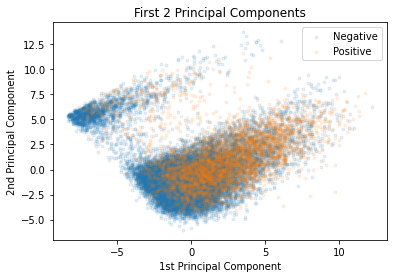

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

In [19]:
positive = data[labels==1]
negative = data[labels==0]

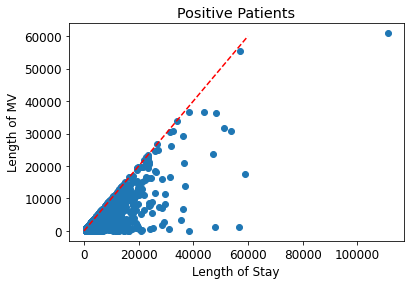

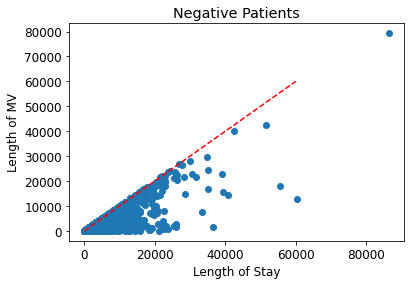

In [20]:
plt.figure()
plt.scatter(positive[positive["mv_duration"] != 0]["LOS"], positive[positive["mv_duration"] != 0]["mv_duration"])
plt.plot([0, 60000], [0, 60000], 'r--')
plt.xlabel("Length of Stay")
plt.ylabel("Length of MV")
plt.title("Positive Patients")
plt.show()

plt.figure()
plt.scatter(negative[negative["mv_duration"] != 0]["LOS"], negative[negative["mv_duration"] != 0]["mv_duration"])
plt.plot([0, 60000], [0, 60000], 'r--')
plt.xlabel("Length of Stay")
plt.ylabel("Length of MV")
plt.title("Negative Patients")
plt.show()

# Logistic Regression

In [12]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs".format(lead, obs, lead, obs), calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.025, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


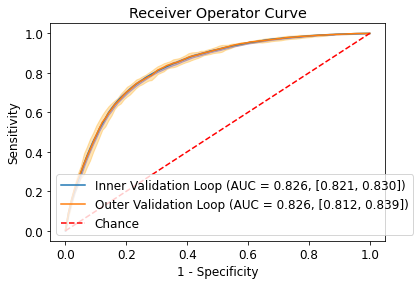

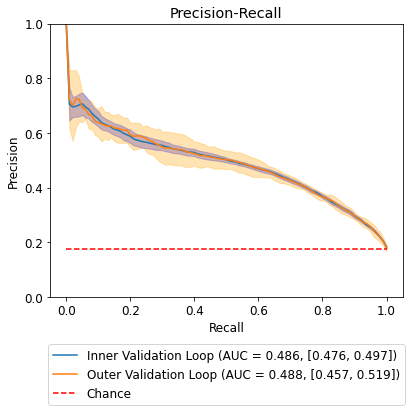

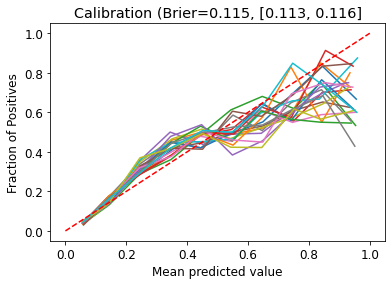

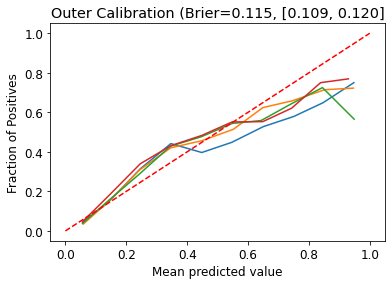

In [13]:
result_dict = lr_calibrated
name = "relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated".format(lead, obs)
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])

plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.015, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [15]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_selected_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(selected_feat, f)

119
LOS
Age
APACHEIVscore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
HistAICD
HistAngina
HistArrythmia
HistCABG
HistHypertension
HistPacemaker
HistPulmEmb
HistHeartTransp
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
HistSteroid Use
HistRadiationTherapy
HistCancer
HistClottingDisorder
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistSeizures
HistTIA
HistRespiratoryFail
HistRestrictiveDis
HistStoneDisease
HistRheumatic
relative_3hr_lead_3hr_obsAdrenergicBronchodilators
relative_3hr_lead_3hr_obsaminoglycosides
relative_3hr_lead_3hr_obsAnticholinergicBronchodilators
relative_3hr_lead_3hr_obsAnticholinergics
relative_3hr_lead_3hr_obsAntidiarrheals
relative_3hr_lead_3hr_obsAntiemetics
relative_3hr_lead_3hr_obsAntihistamines
relative_3hr_lead_3hr_obsBenzodiazepines
relative_3hr_lead_3hr_obsBetaBlockers
relative_3hr_lead_3hr_obsCarbapenems
relative_3hr_lead_3hr_obsCephalosporins
relative_3hr_lead_3hr_obsColloidFluids
relativ

In [16]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(dropped_feat, f)

82
AdmitWeight
HistCHF
HistMI
HistPVD
HistPCI
HistValveDis
HistVenThromb
HistCushing
Histdiabetes
HistCirrhosis
HistHypersplenism
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistHemolyticAnemia
HistHypercoagulableCondition
HistIntracranialMass
HistNeuromuscularDis
HistStrokes
HistAsthma
HistCOPD
HistLungTransp
HistSarcoidosis
HistNeurogenicBladd
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
relative_3hr_lead_3hr_obsAcetaminophen
relative_3hr_lead_3hr_obsAnticoagulants
relative_3hr_lead_3hr_obsBarbiturates
relative_3hr_lead_3hr_obsCalciumChannelBlockers
relative_3hr_lead_3hr_obsClassVAntiarrhythmics
relative_3hr_lead_3hr_obsGlucocorticoids
relative_3hr_lead_3hr_obsInsulins
relative_3hr_lead_3hr_obsLaxatives
relative_3hr_lead_3hr_obsMethylxanthines
relative_3hr_lead_3hr_obsPotassiumChannelBlockers
relative_3hr_lead_3hr_obsSodiumChannelBlockers
relative_3hr_lead_3hr_obsSomatostatin
relative_3hr_lead_3hr_obsSSRIAntidepressants
relative_3hr_lead_3hr_obsTricyclicAntid

In [17]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl".format(lead, obs), "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [18]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

ipykernel_launcher:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


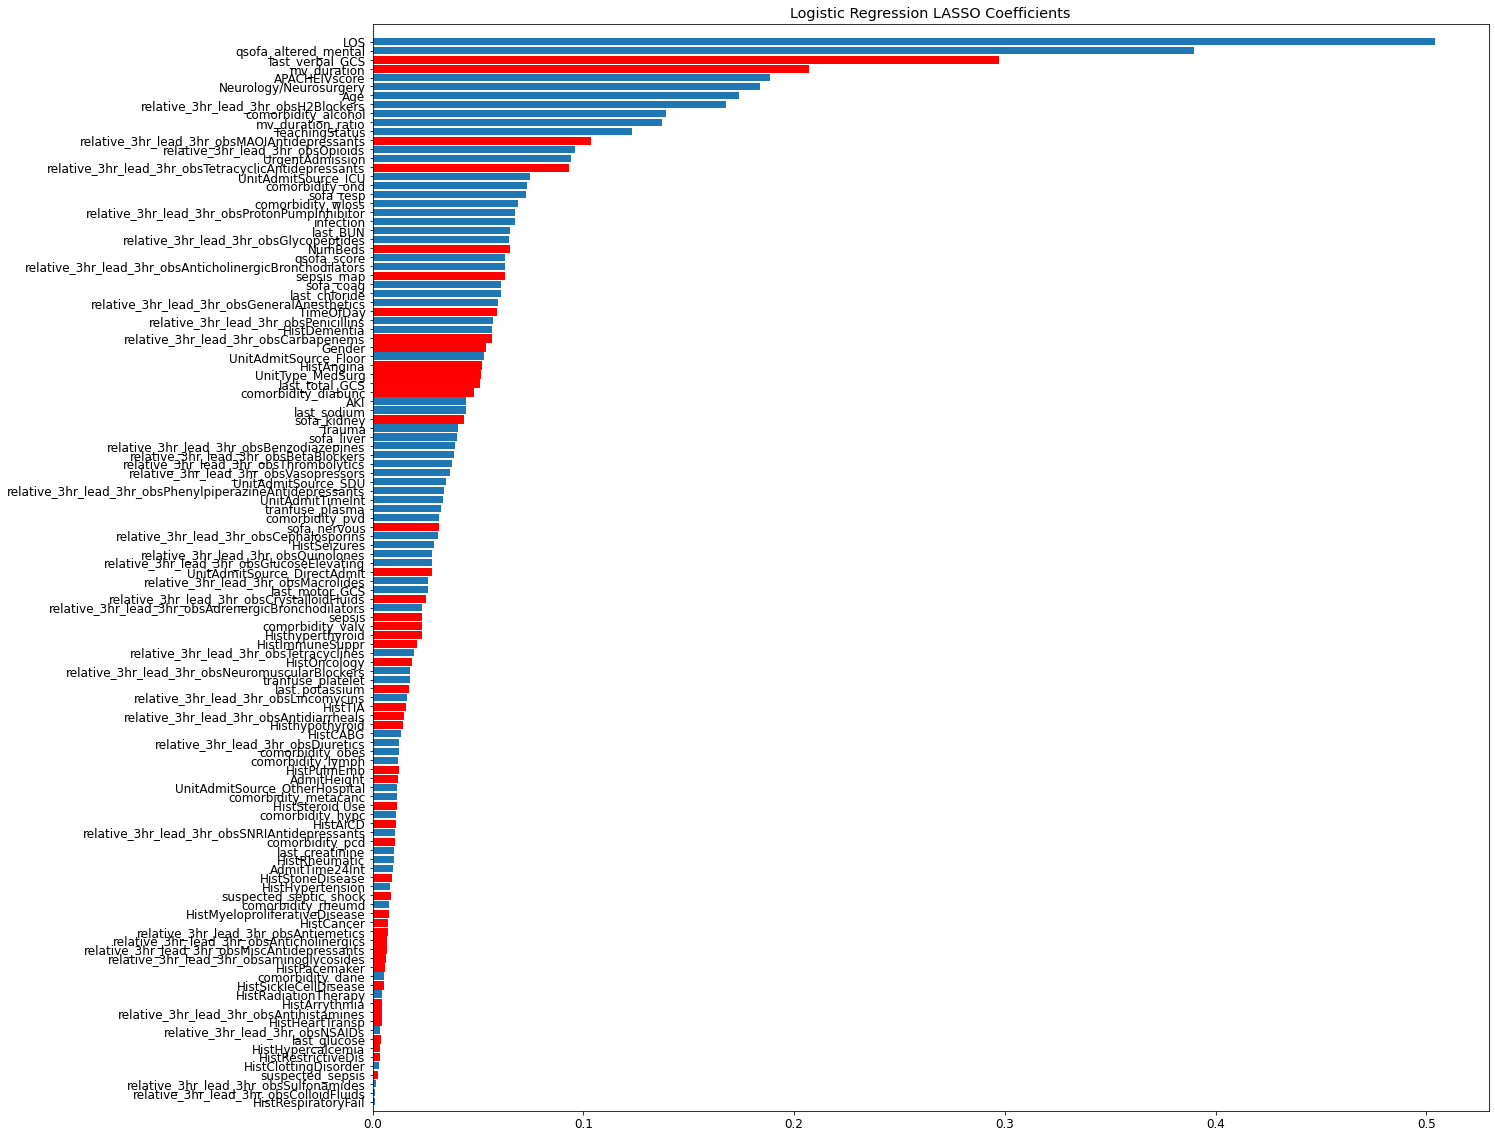

In [19]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

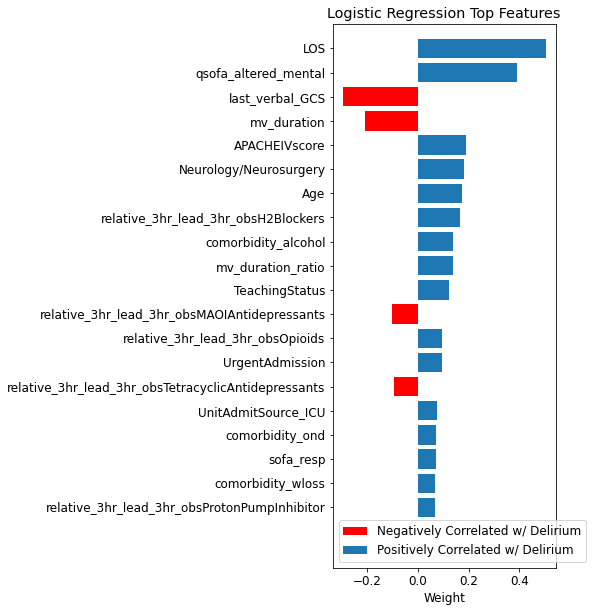

In [20]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "Stepdown Unit",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_coefficients_short.png'.format(lead, obs), dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

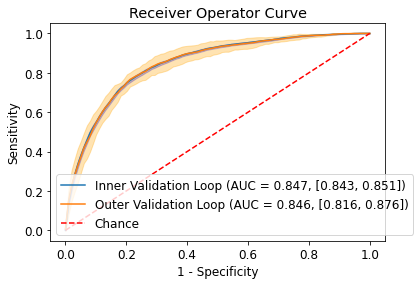

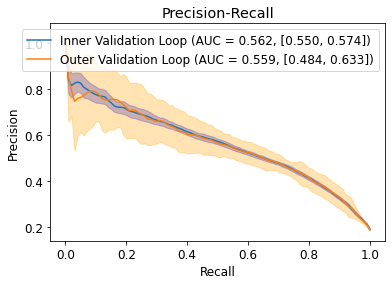

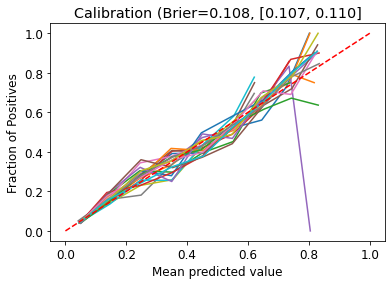

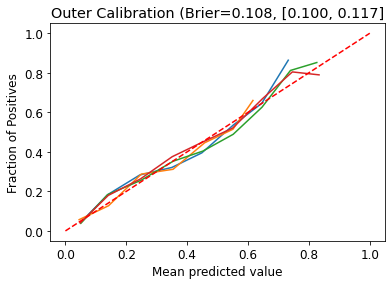

In [2]:
with open("../pickle/relative_3hr_lead_1hr_obs/mean_unpruned/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_3hr_lead_1hr_obs/mean_unpruned/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

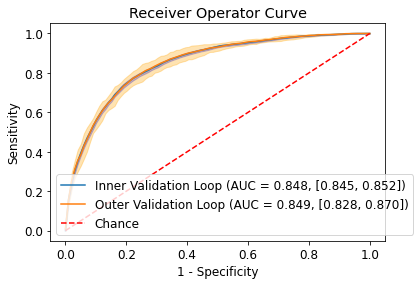

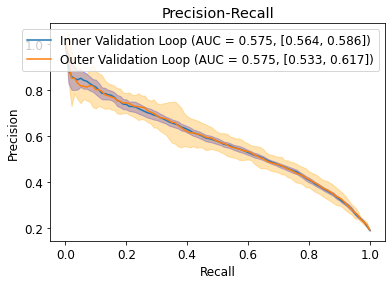

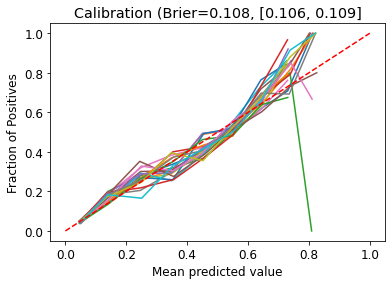

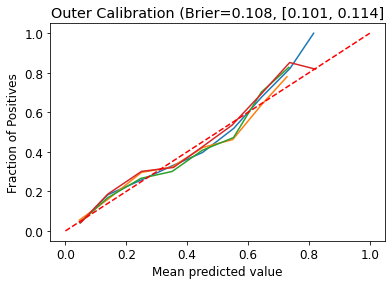

In [11]:
with open("../pickle/relative_3hr_lead_1hr_obs/mean_pruned/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_3hr_lead_1hr_obs/mean_pruned/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

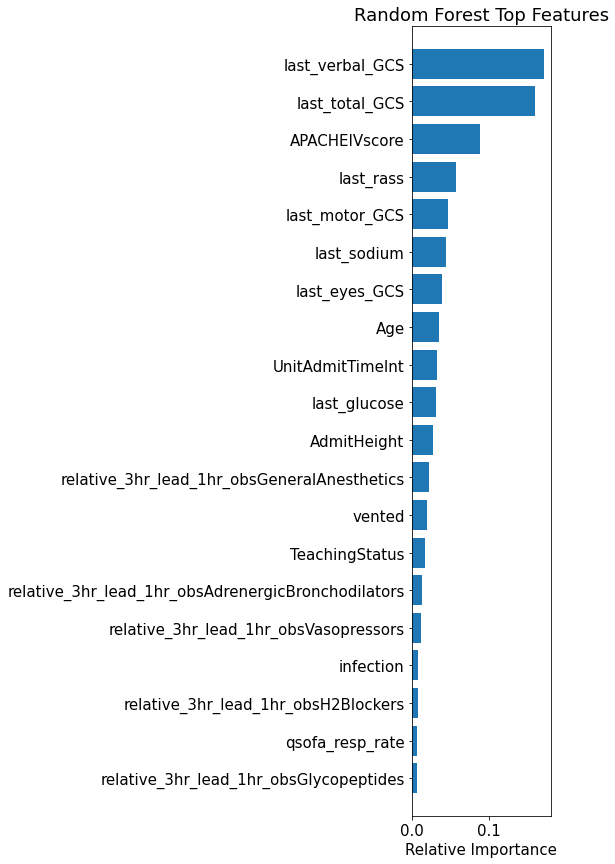

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

In [22]:
catboost_result = run_parallel_cross_validation(data, 
												"CatBoostClassifier",
												{"n_estimators": 3000},
												"from catboost import CatBoostClassifier",
												run_once = True,
												bayes=False,
												calibrate=True,
												n_jobs=2,
												run_id=5,
												outer_tuning=True,
												outer_labels=labels)

Inner Validation Complete


In [23]:
import pickle
with open("../pickle/relative_3hr_lead_1hr_obs/mean_unpruned/catboost", "wb") as f:
    pickle.dump(catboost_result, f)

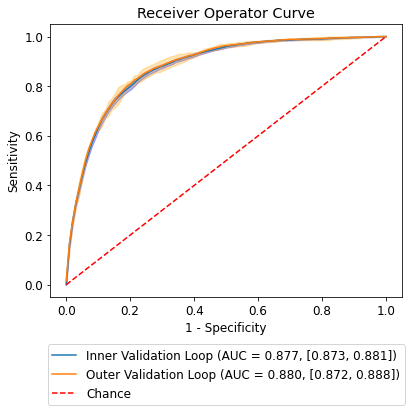

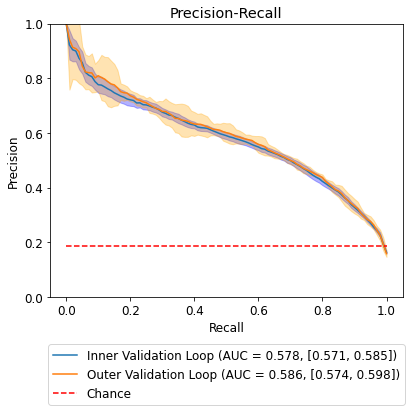

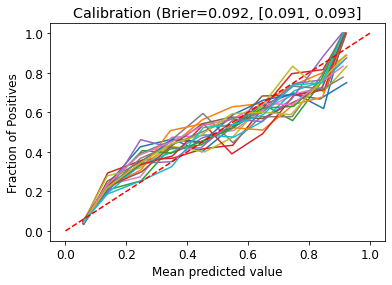

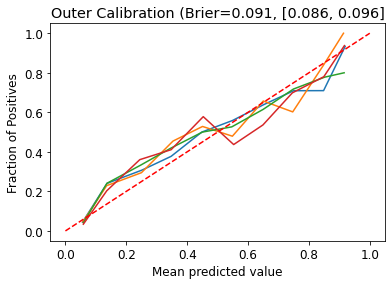

In [24]:
with open("../pickle/relative_3hr_lead_1hr_obs/mean_unpruned/catboost", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "relative_3hr_lead_1hr_obs/mean_unpruned/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()
